In [1]:
from data_handler import DataUtils
from sklearn.model_selection import train_test_split
import keras
from keras import layers
from keras import ops
import matplotlib.pyplot as plt

if __name__ == "__main__":
    DATASET_PATH = "data.json"
    data_util = DataUtils(DATASET_PATH)
    # load data
    inputs, targets = data_util._get_inputs_and_targets()
    
    # split data into train and test sets
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(
        inputs, targets, test_size=0.3
    )


    

In [2]:
# print(inputs.shape[0]) # 4993
# print(len(inputs)) # 4993
print(inputs.shape[1]) # 259
print(inputs.shape[2]) # 13
# print(inputs[1]) # 259
# print(inputs[2]) # 13
# print(inputs.shape) # shape (4993, 259, 13)
    
    
## build the network architecture
model = keras.Sequential([
        # Input Layer
    keras.Input(shape=(inputs.shape[1], inputs.shape[2])),  # (259, 13), where "13" here is MFCC's coefficient
    layers.Flatten(),  # This will flatten the (259, 13) shape to 3367
        # 1st Hidden Layer
    layers.Dense(512, activation="relu"), # Rectified Linear Unit
    # 2nd Hidden Layer
    layers.Dense(256, activation="relu"), # Rectified Linear Unit
    # 3rd Hidden Layer
    layers.Dense(64, activation="relu"), # Rectified Linear Unit
        
    # Output Layer
    layers.Dense(10, activation="softmax"),
])

# """
# Explanation:
# - The output layer has 10 neurons, each representing one of the 10 possible genres.
# - The activation function used is "softmax" because:
#     - Softmax produces a probability distribution over the 10 genres.
#      - The probabilities across all neurons sum to 1, ensuring that only a single genre is predicted as the most likely (the "winner").
# - This is ideal for multi-class classification tasks where only one class (genre) should be selected.

# Why not use sigmoid here?
# - Sigmoid activation treats each output neuron independently, meaning:
#     - Each neuron outputs a value between 0 and 1, representing the probability of that genre.
#     - Probabilities across neurons do not sum to 1, allowing multiple genres to be predicted simultaneously.
# - This behavior is suitable for multi-label classification (e.g., predicting multiple genres for a single track) but not for single-label classification where only one genre is expected.
# """

130
13


In [3]:

# Compile Network  
# Remember " No Free Lunch Theorem (NFL) "
# Trial and Error
# Test which is the best optimizer
# " -- but end of the day this is just a hyperparameter decision"
learning_rate = 0.001
optimizers = {
    'SGD': keras.optimizers.SGD(learning_rate=learning_rate),
    'Adam': keras.optimizers.Adam(learning_rate=learning_rate),
    'RMSprop': keras.optimizers.RMSprop(learning_rate=learning_rate),
    'Adagrad': keras.optimizers.Adagrad(learning_rate=learning_rate),
    'Adadelta' : keras.optimizers.Adadelta(learning_rate=learning_rate),
    'Adamax' : keras.optimizers.Adamax(learning_rate=learning_rate),
    'Nadam' : keras.optimizers.Nadam(learning_rate=learning_rate)
}   
# """
#     binary_crossentropy: Used for binary classification or multi-label classification where each output is independent, with a sigmoid activation function.
#     sparse_categorical_crossentropy: Used for multi-class problems when labels are integer-encoded rather than one-hot encoded.
# """
# https://stackoverflow.com/questions/45799474/keras-model-evaluate-vs-model-predict-accuracy-difference-in-multi-class-nlp-ta/45834857#45834857
# https://stackoverflow.com/questions/42081257/why-binary-crossentropy-and-categorical-crossentropy-give-different-performances
model_histories = []
for name, opt in optimizers.items():
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])
    history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=50, batch_size=32)
    model_histories.append({name : history})

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 24.6313 - sparse_categorical_accuracy: 0.1605 - val_loss: 2.1132 - val_sparse_categorical_accuracy: 0.2527
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.0178 - sparse_categorical_accuracy: 0.2656 - val_loss: 2.0336 - val_sparse_categorical_accuracy: 0.2797
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.9147 - sparse_categorical_accuracy: 0.2975 - val_loss: 1.9831 - val_sparse_categorical_accuracy: 0.2984
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8334 - sparse_categorical_accuracy: 0.3209 - val_loss: 2.0099 - val_sparse_categorical_accuracy: 0.2957
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.8131 - sparse_categorical_accuracy: 0.3355 - val_loss: 1.9358 - val_sparse_categorical_accuracy: 0.3271
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.7436 - sparse_categorical_accuracy: 0.3731 - val_loss: 1.9090 - val_sparse_categorical_accuracy: 0.3308
Epo

Model: SGD
Training Loss: 0.36235904693603516
Validation Loss: 1.817211389541626
Training Accuracy: 0.8783977031707764
Validation Accuracy: 0.5473965406417847
SGD final loss: 0.36235904693603516, validation accuracy: 0.5473965406417847
--------------------------------------------------


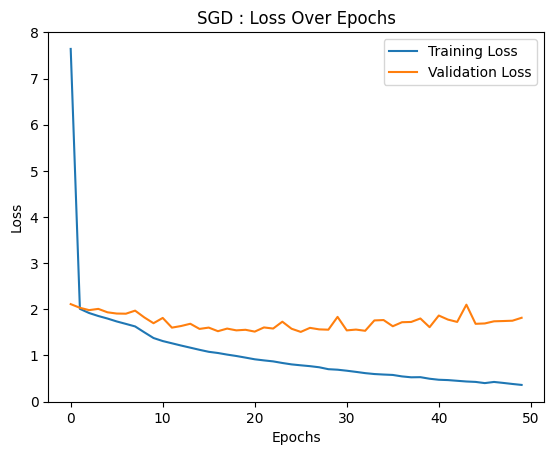

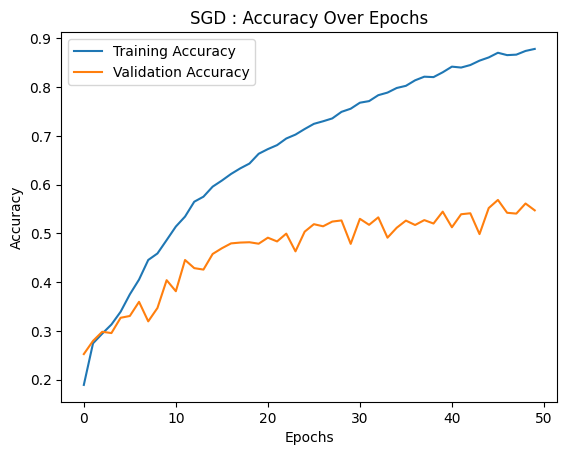

Model: Adam
Training Loss: 1.9846090078353882
Validation Loss: 2.2530715465545654
Training Accuracy: 0.22031474113464355
Validation Accuracy: 0.18291054666042328
Adam final loss: 1.9846090078353882, validation accuracy: 0.18291054666042328
--------------------------------------------------


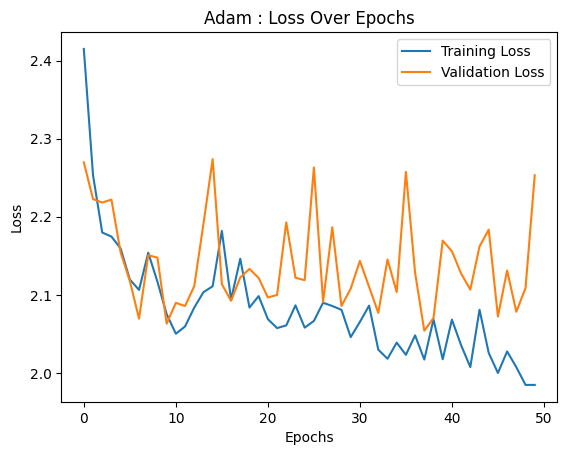

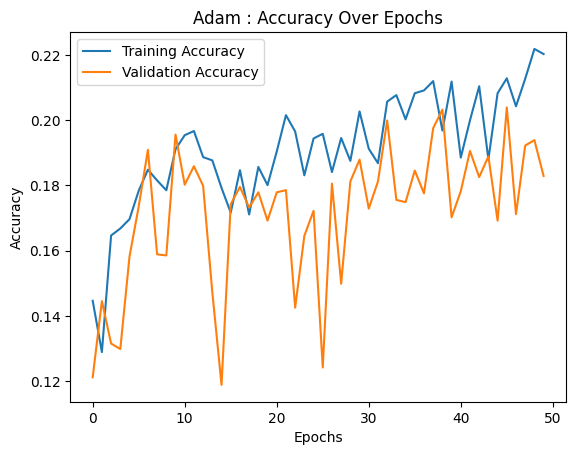

Model: RMSprop
Training Loss: 1.9424375295639038
Validation Loss: 6.484202861785889
Training Accuracy: 0.24835479259490967
Validation Accuracy: 0.2112817019224167
RMSprop final loss: 1.9424375295639038, validation accuracy: 0.2112817019224167
--------------------------------------------------


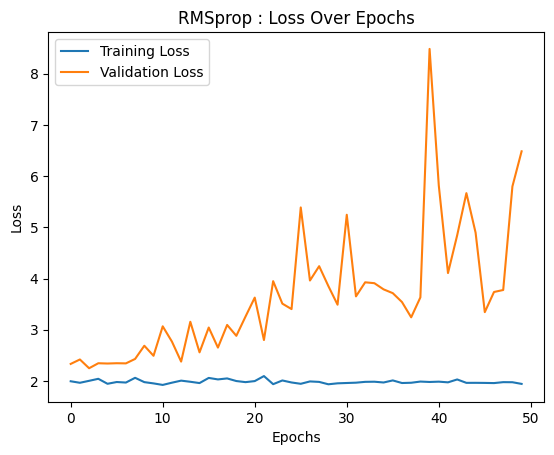

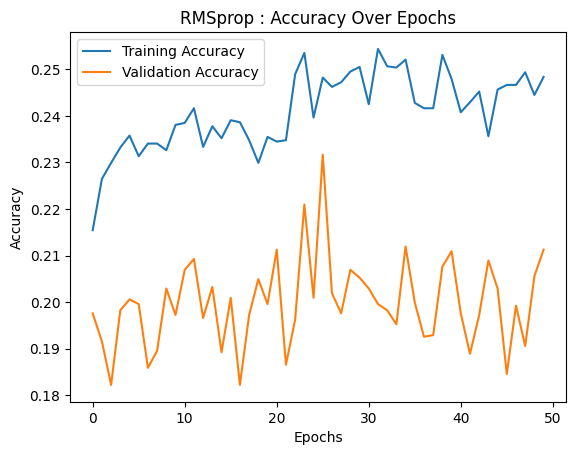

Model: Adagrad
Training Loss: 1.8385213613510132
Validation Loss: 6.804739475250244
Training Accuracy: 0.27324751019477844
Validation Accuracy: 0.22596795856952667
Adagrad final loss: 1.8385213613510132, validation accuracy: 0.22596795856952667
--------------------------------------------------


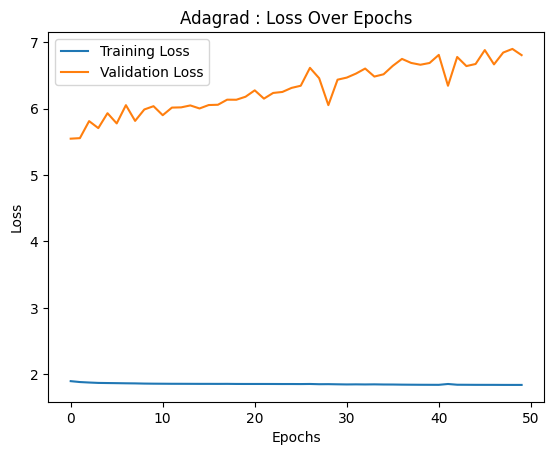

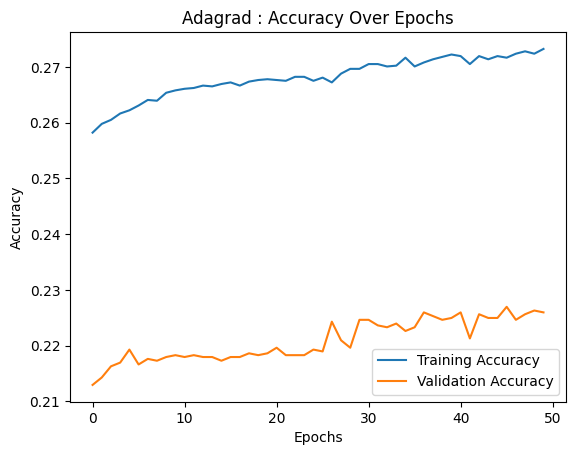

Model: Adadelta
Training Loss: 1.8367165327072144
Validation Loss: 6.893841743469238
Training Accuracy: 0.2735336124897003
Validation Accuracy: 0.22630172967910767
Adadelta final loss: 1.8367165327072144, validation accuracy: 0.22630172967910767
--------------------------------------------------


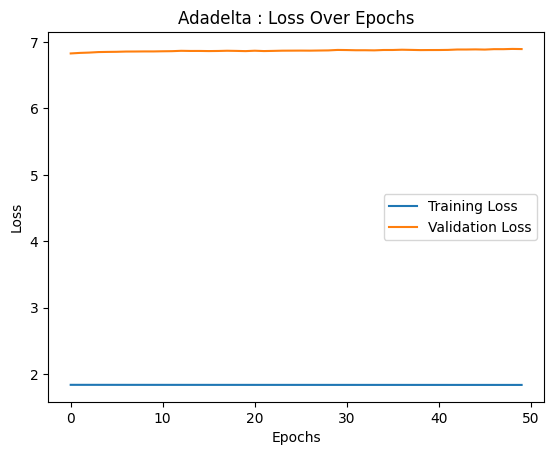

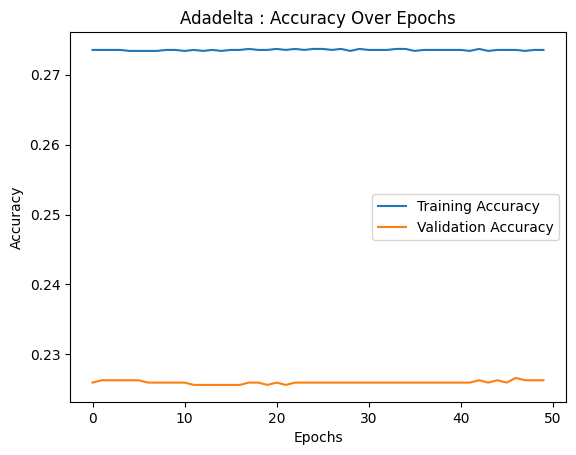

Model: Adamax
Training Loss: 1.7312042713165283
Validation Loss: 8.751795768737793
Training Accuracy: 0.3228898346424103
Validation Accuracy: 0.2650200128555298
Adamax final loss: 1.7312042713165283, validation accuracy: 0.2650200128555298
--------------------------------------------------


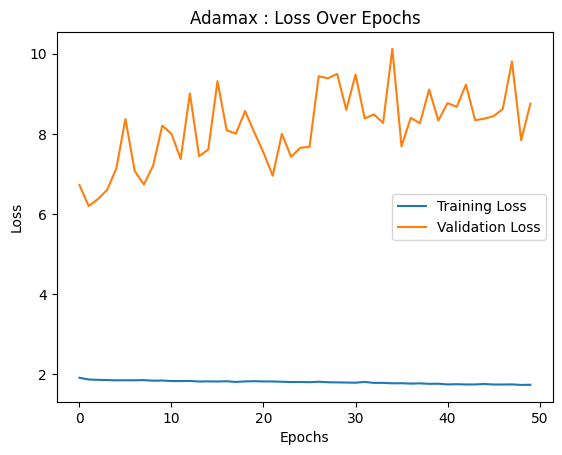

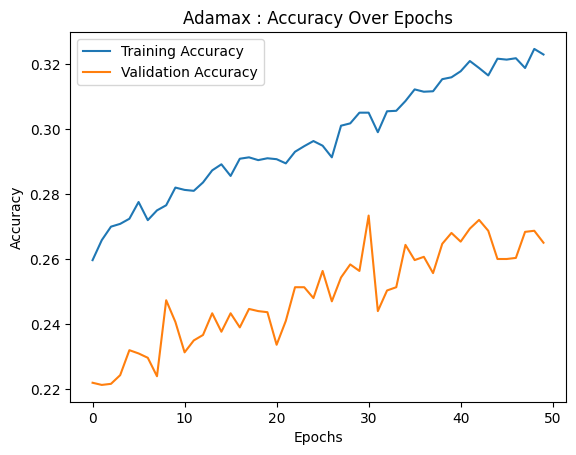

Model: Nadam
Training Loss: 2.1365647315979004
Validation Loss: 2.509871482849121
Training Accuracy: 0.17238913476467133
Validation Accuracy: 0.15587450563907623
Nadam final loss: 2.1365647315979004, validation accuracy: 0.15587450563907623
--------------------------------------------------


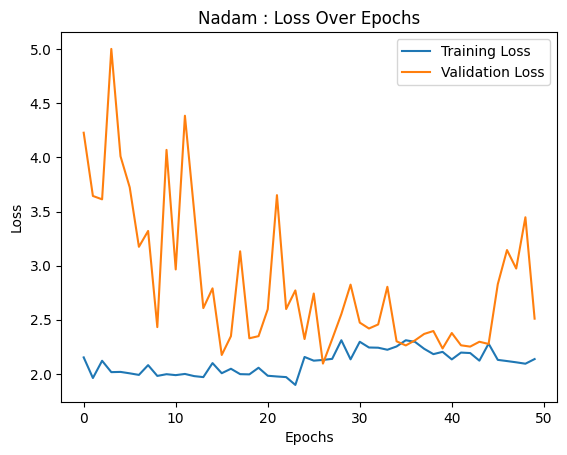

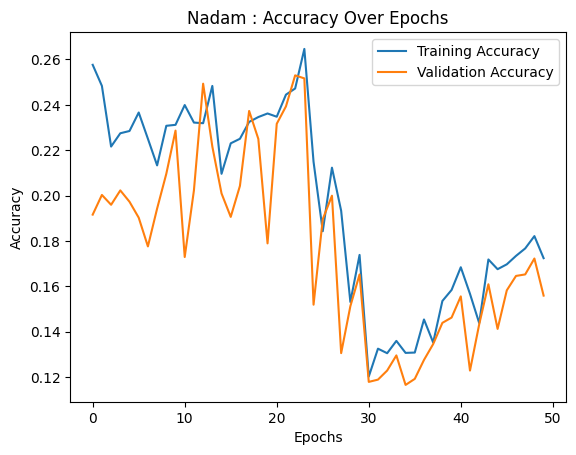

In [4]:
# print(model_histories)
# Iterating over the model_histories to print the results
for model_history in model_histories:
    for name, history in model_history.items():
        print(f"Model: {name}")
        
        # Accessing the history (loss and accuracy values)
        print(f"Training Loss: {history.history['loss'][-1]}")
        print(f"Validation Loss: {history.history['val_loss'][-1]}")
        print(f"Training Accuracy: {history.history['sparse_categorical_accuracy'][-1]}")
        print(f"Validation Accuracy: {history.history['val_sparse_categorical_accuracy'][-1]}")
        print(f"{name} final loss: {history.history['loss'][-1]}, validation accuracy: {history.history['val_sparse_categorical_accuracy'][-1]}")
        print("-" * 50)  # Just to separate the outputs for each optimizer  

        # Access loss and accuracy
        # print(history.history.keys())  # Shows available metrics like 'loss', 'accuracy', etc.

        # Plotting training and validation loss
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()
        plt.title(name + ' : Loss Over Epochs')
        plt.show()

        # Plotting training and validation accuracy (if available)
        plt.plot(history.history['sparse_categorical_accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_sparse_categorical_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()
        plt.title(name + ' : Accuracy Over Epochs')
        plt.show()

In [5]:
# Function to identify the best optimizer
def identify_best_optimizer(model_histories):
    best_optimizer = None
    best_val_loss = float('inf')  # Start with infinity to ensure any optimizer is better initially
    best_val_accuracy = 0  # Start with 0 as the best validation accuracy
    
    # Iterate over the model histories
    for model_history in model_histories:
        for name, history in model_history.items():
            # Last value ([-1]) is used since it summarized the model's final performance at the end of training.
            val_loss = history.history['val_loss'][-1]
            val_accuracy = history.history['sparse_categorical_accuracy'][-1]
            # print(name)
            # print(val_loss)
            # print(val_accuracy)
            # print("-" * 50)
            # Identify the optimizer with the lowest validation loss and highest validation accuracy
            if val_loss < best_val_loss and val_accuracy > best_val_accuracy:
                best_val_loss = val_loss
                best_val_accuracy = val_accuracy
                best_optimizer = name
    
    return best_optimizer, best_val_loss, best_val_accuracy

# Example of calling the function
best_optimizer, best_val_loss, best_val_accuracy = identify_best_optimizer(model_histories)
print(f"The best optimizer is: {best_optimizer}")
print(f"Best validation loss: {best_val_loss}")
print(f"Best validation accuracy: {best_val_accuracy}")


The best optimizer is: SGD
Best validation loss: 1.817211389541626
Best validation accuracy: 0.8783977031707764


In [6]:
for name, opt in optimizers.items():
    if(name == "SGD"):
        model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        history = model.fit(inputs_train, targets_train, validation_data=(inputs_test, targets_test), epochs=50, batch_size=32)
        model_histories.append({name : history})

Epoch 1/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1632 - loss: 2.1872 - val_accuracy: 0.1238 - val_loss: 2.4329
Epoch 2/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1372 - loss: 2.2369 - val_accuracy: 0.1248 - val_loss: 2.4539
Epoch 3/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1405 - loss: 2.2120 - val_accuracy: 0.1295 - val_loss: 2.4610
Epoch 4/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1421 - loss: 2.2099 - val_accuracy: 0.1519 - val_loss: 2.9811
Epoch 5/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1790 - loss: 2.1280 - val_accuracy: 0.1338 - val_loss: 3.2634
Epoch 6/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1577 - loss: 2.1690 - val_accuracy: 0.1459 - val_loss: 5.0797
Epoch 7/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1632 - loss: 2.1461 - val_accuracy: 0.1462 - val_loss: 5.4320
Epoch 8/50
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.1757 - loss: 2.1167 - val_accuracy: 0.